In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
%aimport -os
import sys
%aimport -sys
import numpy as np
%aimport -numpy
from itertools import chain, product
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
%aimport -matplotlib.pyplot

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
from webmet.merge import WebKernel, WebLine, load_kernel, multi_find_centroid, legacy_plot_kernel, plot_kernel

In [4]:
weblinescopetest = WebLine([[1, 1], [6, 3]])

def mutatetest(line):
    line.line_type=3
    print(line)
    return line

print(weblinescopetest)
weblinescopetest_after = mutatetest(weblinescopetest)
print(weblinescopetest)
print(weblinescopetest_after)

[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Uncategorised
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1


In [5]:
testkernel = load_kernel("../data/full_web_kernel_best.json", flipped=False)
testkernel = testkernel.paint({x:1 for x in range(1000)})
testkernel = testkernel.paint({x:3 for x in range(1000, 2000)}, reset_missing=False)
# testkernel = testkernel.demo_random_paint()
plot_kernel(testkernel)

In [6]:
def is_vert(theta, threshold=np.pi/20):
    if np.pi/2 + threshold >= theta >= np.pi/2 - threshold:
        return True
    if -np.pi/2 + threshold >= theta >= -np.pi/2 - threshold:
        return True
    return False

def is_horiz(theta, threshold=np.pi/20):
    if 0 + threshold >= theta >= 0 - threshold:
        return True
    if -np.pi + threshold >= theta >= -np.pi:
        return True
    if np.pi >= theta >= np.pi - threshold:
        return True
    return False

In [7]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def classify_threads(kernel, hub, threshold=np.pi/20, vertthresh=True):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    
    polar = kernel.to_polar(origin = hub, flipped = True).rescale(dimensions=kernel.dimensions).recalculate_transformed_orientations()
    
    out = {l.id: 3 for l in polar if is_horiz(l.transformed_orientation, threshold)}
    out.update({l.id: 1 for l in polar if is_vert(l.transformed_orientation, threshold)})
    
    return out
#     [1 for o in line_orientations if is_horiz(o, threshold)]
    
    
classify_map = classify_threads(testkernel, (1257, 847), np.pi/5) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
classify_map


{0: 3,
 5: 3,
 6: 3,
 7: 3,
 10: 3,
 22: 3,
 27: 3,
 31: 3,
 32: 3,
 34: 3,
 38: 3,
 45: 3,
 48: 3,
 51: 3,
 53: 3,
 54: 3,
 56: 3,
 57: 3,
 61: 3,
 73: 3,
 74: 3,
 75: 3,
 78: 3,
 79: 3,
 81: 3,
 87: 3,
 99: 3,
 102: 3,
 104: 3,
 106: 3,
 108: 3,
 114: 3,
 117: 3,
 121: 3,
 122: 3,
 124: 3,
 126: 3,
 128: 3,
 129: 3,
 136: 3,
 137: 3,
 140: 3,
 143: 3,
 149: 3,
 153: 3,
 157: 3,
 159: 3,
 162: 3,
 170: 3,
 175: 3,
 178: 3,
 186: 3,
 188: 3,
 189: 3,
 193: 3,
 214: 3,
 219: 3,
 221: 3,
 227: 3,
 230: 3,
 232: 3,
 233: 3,
 238: 3,
 240: 3,
 241: 3,
 243: 3,
 244: 3,
 245: 3,
 246: 3,
 251: 3,
 254: 3,
 257: 3,
 258: 3,
 260: 3,
 261: 3,
 263: 3,
 264: 3,
 265: 3,
 269: 3,
 270: 3,
 271: 3,
 274: 3,
 277: 3,
 281: 3,
 282: 3,
 284: 3,
 285: 3,
 290: 3,
 294: 3,
 297: 3,
 298: 3,
 299: 3,
 300: 3,
 305: 3,
 308: 3,
 312: 3,
 313: 3,
 317: 3,
 320: 3,
 322: 3,
 324: 3,
 326: 3,
 327: 3,
 330: 3,
 331: 3,
 335: 3,
 340: 3,
 342: 3,
 343: 3,
 352: 3,
 354: 3,
 357: 3,
 360: 3,
 361: 3,
 367:

In [8]:
testkernel.paint(classify_map, reset_missing=True)
plot_kernel(testkernel)

In [9]:
plot_kernel(testkernel, transformed=True)

In [10]:
def classify_threads_flexible(kernel, hub, threshold=np.pi/20, hub_threshold_prop=0.07, ellipse_orientation=0, ellipse_scale=1):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    
    if ellipse_scale != 1:
        polar = kernel.ellipse_and_polar(origin=hub, orientation=ellipse_orientation,scaling=ellipse_scale, flipped=True, )
    else:
        polar = kernel.to_polar(origin = hub, flipped = True)
    
    polar.rescale(dimensions=kernel.dimensions).recalculate_transformed_orientations()
    
    t, r = zip(*list(chain.from_iterable(polar.as_list_transformed())))
    rmax = max(r)
    print(rmax*hub_threshold_prop)
    rmin = min(r)
    
    
    out = dict()
    for l in polar:
        if is_vert(l.transformed_orientation, threshold):
            out[l.id] = 1    # Radial Line
        else:
#         elif is_horiz(l.transformed_orientation, threshold):
            l_t, l_r = np.array(l.transformed_line)[:, 0], np.array(l.transformed_line)[:, 1]
            if any(l_r <= rmax*hub_threshold_prop):
                out[l.id] = 2    # Hub
            else:
                out[l.id] = 3    # Sticky
    return out
    
    
classify_map_flexible = classify_threads_flexible(testkernel, (1257, 847), np.pi/5) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
testkernel.paint(classify_map_flexible, reset_missing=True)
plot_kernel(testkernel)

109.15487208549145


In [11]:
plot_kernel(testkernel, transformed=True)

- Is the hub made as part of the radial lines?

In [12]:
    import seaborn as sns
    %aimport -seaborn

    r_vals = []
    for x in testkernel:
        if x.line_type > 1:
            working = list()
            tl = np.array(x.transformed_line)
            t, r = tl[:, 0], tl[:, 1]
            r_vals.extend(np.repeat(np.mean(r), 1).tolist())
    plt.figure(figsize=(16, 6))
    sns.distplot(r_vals, hist=True,bins=200, kde=True, rug=True, axlabel="Radial Distance")
    plt.axvline(75, color="orange")
    plt.axvline(125, color="royalblue")
    plt.axvline(700, color="royalblue")
    plt.axvline(750, color="green")
    plt.xlim(0, max(r_vals))

(0, 1131.4183819518644)

To make a density plot weighted by length of line, it would be best to repeat each value by its length. This magnifies every entry by its line length.

This will make the data VERY large though, so a better custom implementation will be needed, but this is a nice quick and dirty hack.

(0, 1131.4183819518644)

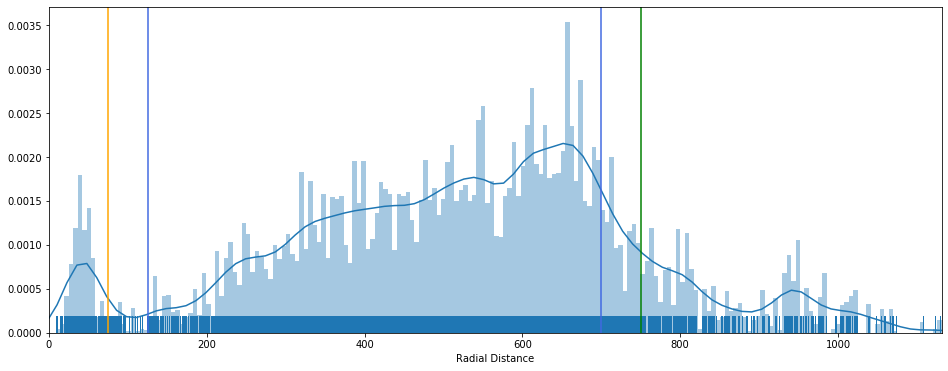

In [13]:
r_vals_lenweight = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        # Repeat each value by its normal space length
        r_vals_lenweight.extend(np.repeat(np.mean(r), (np.ceil(x.length))).tolist())
plt.figure(figsize=(16, 6))
sns.distplot(r_vals_lenweight, hist=True,bins=200, kde=True, rug=True, axlabel="Radial Distance")
plt.axvline(75, color="orange")
plt.axvline(125, color="royalblue")
plt.axvline(700, color="royalblue")
plt.axvline(750, color="green")
plt.xlim(0, max(r_vals_lenweight))


- Now correcting for the inherent increase in length as you go out from the centre by dividing the length by the r value
- Try this method on an archimedian spiral and concentric circles to see how artificial data behaves
- Make a big point in the introduction of why we AREN'T using ML tech


In [14]:
r_vals_lenweight_rcorrect = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        # Repeat each value by its normal space length
        r_vals_lenweight_rcorrect.extend(np.repeat(np.mean(r), (np.ceil(x.length/np.mean(r)))).tolist())
plt.figure(figsize=(16, 6))
sns.distplot(r_vals_lenweight_rcorrect, hist=True,bins=200, kde=True, rug=True, axlabel="Radial Distance")
plt.axvline(75, color="orange")
plt.axvline(125, color="royalblue")
plt.axvline(700, color="royalblue")
plt.axvline(750, color="green")
plt.xlim(0, max(r_vals_lenweight_rcorrect))


(0, 1131.4183819518644)

[]

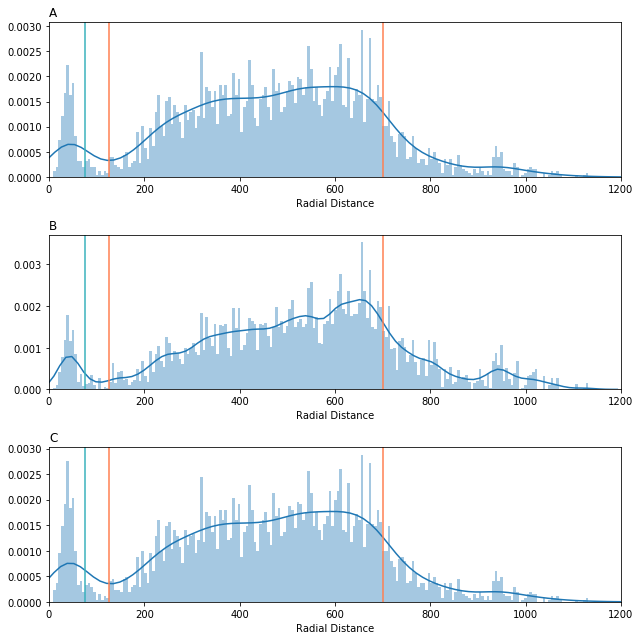

In [15]:
# "linemap": ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]


fig, ax = plt.subplots(nrows=3, figsize=(9,9))
sns.distplot(r_vals, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax[0])
sns.distplot(r_vals_lenweight, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax[1])
sns.distplot(r_vals_lenweight_rcorrect, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax[2])

ax[0].set_title('A', loc='left')
ax[1].set_title('B', loc='left')
ax[2].set_title('C', loc='left')

for a in ax:
    a.set_xlim(0,1200)
    a.axvline(75, color="#38B1BC")
    a.axvline(125, color="#FF7F50")
    a.axvline(700, color="#FF7F50")
#     a.axvline(750, color="green")
fig.tight_layout()
plt.plot()

# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/class_dists.pdf', bbox_inches='tight', dpi=300)

[]

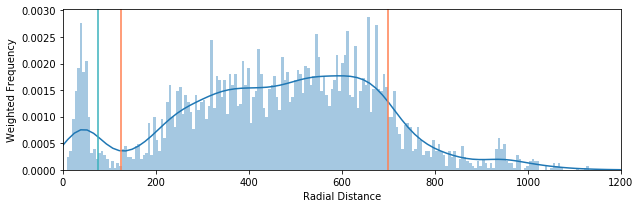

In [16]:
# "linemap": ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]


fig, ax = plt.subplots(figsize=(9,3))
# sns.distplot(r_vals, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax[0])
# sns.distplot(r_vals_lenweight, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax[1])
sns.distplot(r_vals_lenweight_rcorrect, hist=True,bins=200, kde=True, axlabel="Radial Distance", ax=ax)

# ax[0].set_title('A', loc='left')
# ax[1].set_title('B', loc='left')
# ax[2].set_title('C', loc='left')

ax.set_xlim(0,1200)
ax.axvline(75, color="#38B1BC")
ax.axvline(125, color="#FF7F50")
ax.axvline(700, color="#FF7F50")
#     a.axvline(750, color="green")

ax.set_ylabel("Weighted Frequency")

fig.tight_layout()
plt.plot()

# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/class_dists.pdf', bbox_inches='tight', dpi=300)

## Mesh Width Calc
- Cast out rays from hub to bounding box at fixed angular distance
- For each ray
  - Find all the places where each ray intersects sticky spiral lines
  - Note line lengths and start and end coords
- Get median of set of ray segments
- Take each two rays and join them with an imaginary line to draw triangle
- Sum areas of triangles taken to end of sticky spiral
- take away sum of internal triangles taken up to the start point of the sticky spiral

### Find Intersecting Segments

In [17]:
# Given three colinear points p, q, r, the function checks if  
# point q lies on line segment 'pr'  
def onSegment(p, q, r): 
    if ( (q[0] <= max(p[0], r[0])) and (q[0] >= min(p[0], r[0])) and 
        (q[1] <= max(p[1], r[1])) and (q[1] >= min(p[1], r[1]))):
        return True
    return False
  
def orientation(p, q, r): 
    # to find the orientation of an ordered triplet (p,q,r) 
    # function returns the following values: 
    # 0 : Colinear points 
    # 1 : Clockwise points 
    # 2 : Counterclockwise 
      
    # See https://www.geeksforgeeks.org/orientation-3-ordered-points/amp/  
    # for details of below formula.  
      
    val = (float(q[1] - p[1]) * (r[0] - q[0])) - (float(q[0] - p[0]) * (r[1] - q[1])) 
    if (val > 0): 
          
        # Clockwise orientation 
        return 1
    elif (val < 0): 
          
        # Counterclockwise orientation 
        return 2
    else: 
          
        # Colinear orientation 
        return 0

# The main function that returns true if
# the line segment 'p1q1' and 'p2q2' intersect. 
def is_intersecting(l1,l2): 
    p1, q1 = l1
    p2, q2 = l2
    
    # Find the 4 orientations required for  
    # the general and special cases 
    o1 = orientation(p1, q1, p2) 
    o2 = orientation(p1, q1, q2) 
    o3 = orientation(p2, q2, p1) 
    o4 = orientation(p2, q2, q1) 
  
    # General case 
    if ((o1 != o2) and (o3 != o4)): 
        return True
  
    # Special Cases 
    p2onp1q1 = False
    q2onp1q1 = False
    p1onp2q2 = False
    q1onp2q2 = False
    # p1 , q1 and p2 are colinear and p2 lies on segment p1q1 
    if ((o1 == 0) and onSegment(p1, p2, q1)): 
        p2onp1q1 = True
  
    # p1 , q1 and q2 are colinear and q2 lies on segment p1q1 
    if ((o2 == 0) and onSegment(p1, q2, q1)): 
        q2onp1q1 = True
  
    # p2 , q2 and p1 are colinear and p1 lies on segment p2q2 
    if ((o3 == 0) and onSegment(p2, p1, q2)): 
        p1onp2q2 = True
  
    # p2 , q2 and q1 are colinear and q1 lies on segment p2q2 
    if ((o4 == 0) and onSegment(p2, q1, q2)): 
        q2onp2q2 = True
    
    pointline_intersects = [p2onp1q1, q2onp1q1, p1onp2q2, q1onp2q2]
    
    if any(pointline_intersects):
        print("pointline_intersects = {}".format(pointline_intersects))
        if p2onp1q1 and q2onp1q1:
            # (p2,q2) is entirely on (p1,q1)
            return False
        if p2onp1q1 and q2onp1q1:
            # (p2,q2) is entirely on (p1,q1)
            return False
        else:
            return True
  
    # If none of the cases 
    return False
  
# Driver program to test above functions: 
l1 = [(1, 1),(10, 1)]
l2 = [(1, 2), (10, 2)]
  
if is_intersecting(l1, l2): 
    print("Yes") 
else: 
    print("No") 

l1 = [(10, 0), (0, 10)]
l2 = [(0, 0), (10,10)]
  
if is_intersecting(l1, l2): 
    print("Yes") 
else: 
    print("No") 

l1 = [(-5,-5), (0, 0)]
l2 = [(1, 1), (10, 10)]
  
if is_intersecting(l1, l2): 
    print("Yes") 
else: 
    print("No") 

No
Yes
No


### Find Intersection of Two Segments

In [18]:
np.cross([50,25], [36,47])

array(1450)

In [19]:
print(np.array([6,15]) - np.array([5,18]))

[ 1 -3]


In [20]:
np.array_equal(np.array([1,2]), np.array([1,2]))

True

In [21]:
def find_intersection(l1, l2):
    # Split out to coords, converting to np arrays in the process
    p, p2 = np.array(l1)
    q, q2 = np.array(l2)
    
    # Subtract such that a2 = a + r, b2 = b + s
    r = p2 - p
    s = q2 - q
    
    unumerator = np.cross((q - p), r)
    denominator = np.cross(r, s)
    
    if unumerator == 0 and denominator == 0:
        # Colinear
        pass
    if denominator == 0:
        # Parallel, should raise div0 error
        pass
    u = unumerator / denominator
    t = np.cross((q - p), s) / denominator
#     print(u)
#     print(t)
    
    return (q + u * s).tolist()
#     return (p + t * r).tolist()
    
find_intersection([[1,1], [5,5]],[[5,1], [1,5]])

[3.0, 3.0]

In [22]:
from webmet.merge import point_to_framespace, point_from_framespace, find_line_orientation, line_length
raycount = 64
hub = (1257, 847)
raylength = max(testkernel.dimensions)

# For now make rays just the max dimension length which means they'll always be long enough
thetas = -np.pi + (np.arange(0, raycount) * (((1/raycount)*(2*np.pi))))

xs = hub[0] + raylength*np.cos(thetas)
ys = hub[1] + raylength*np.sin(thetas)

# Do we want to cast these to ints like this?
xs = np.round(xs).astype(int)
ys = np.round(ys).astype(int)

rayends = list(zip(xs, ys))

intersection_points = []
mesh_measurements = []
rays_to_outer_boundary = []
rays_to_inner_boundary = []

sticky_lines = [l.line for l in testkernel.lines if l.line_type == 3]

for rayend in rayends:
    ray = [hub, rayend]
    ray_orientation = find_line_orientation(ray)
    # Find intersecting lines and points where these intersect
    intersections = [find_intersection(ray, line) for line in sticky_lines if is_intersecting(ray, line)]
    if len(intersections) == 0:
        # Continue if there are no measurements found
        # TODO: Be aware, this means that we will be missing one triangle, which should be missed in the capture area equation
        # HOPEFULLY the below code with accomodate for that
        rays_to_inner_boundary.append([[hub, hub], ray_orientation, 0.0])
        rays_to_outer_boundary.append([[hub, hub], ray_orientation, 0.0])
        continue
    
    # Use these points to split line into list of segments (is there a fast way to do this?)
        # Important to remember that as this list does not progress along the ray, the x coords of the breakpoints will need to
        #   be ordered after being transformed to the frame of reference of the ray. (More projections...)
        # Then knowing that the y coords in this space should all be 0, we just reproject them back into normal space
        #   and use this new ordered list of coordinates to define lines to go into the mesh width averaging pot.
    
    # Project lines in the frame of reference of the ray
    projected_intersections = [np.array(point_to_framespace(point, hub, ray_orientation)) for point in intersections]
    
    # Extract x values
    xs, _ = list(zip(*projected_intersections))
    
    # Convert to np array for nice sorting
    xs = np.array(list(xs))
    
    if max(xs) <= 0:
        # We are going backwards so make sure that first encountered breakpoint is closest to hub
        xs = xs[np.argsort(-xs)].tolist()
    else:
        xs = np.sort(xs).tolist()
    
    # Bind back together with 0s
    ys = np.repeat(0.0, len(xs)).tolist()
    projected_intersections = list(zip(xs, ys))
    
    # Convert to normalspace
    intersections = [point_from_framespace(point, hub, ray_orientation) for point in projected_intersections]
    
    # Pair up list into lines
    linestarts = intersections[:-1]
    lineends = intersections[1:]
    
    
    intersection_points.extend(intersections)
    mesh_measurements.extend([line_length(line) for line in zip(linestarts, lineends)])
    
    # First and last elements of this list go into the point lists ready for calculating CA
    ray_to_outer = [ray[0], intersections[-1]]
    ray_to_inner = [ray[0], intersections[0]]
    
    rays_to_inner_boundary.append([ray_to_inner, ray_orientation, line_length(ray_to_inner)])
    rays_to_outer_boundary.append([ray_to_outer, ray_orientation, line_length(ray_to_outer)])
    
    
    # Optimisation Note: Could possibly do some quick filtering of the sticky lines list to make sure they can possibly intersect with the ray?
    

In [23]:
fig, ax = plot_kernel(testkernel, return_objs=True)
for x in intersection_points:
    ax.plot(x[0], x[1], '+w')
plt.show()

In [24]:
print(np.mean(mesh_measurements))
print(np.median(mesh_measurements))

# Measured distances between lines CANNOT be below 1, as that would be subpixel on the original image...
mesh_measurements_highpass = [m for m in mesh_measurements if m >=1]
print(np.mean(mesh_measurements_highpass))
print(np.median(mesh_measurements_highpass))

13.41070206522959
1.0333759387619508
25.657949518079178
23.527245769432056


## CA Calculation
$$A = \frac{ab\sin{\theta}}{2}$$

In [25]:
rays_to_outer_boundary_rot1 = rays_to_outer_boundary[1:] + rays_to_outer_boundary[:1]
outer_ca_segments = list(zip(rays_to_outer_boundary, rays_to_outer_boundary_rot1))
progression_angle = (1/raycount)*(2*np.pi)
outer_area_acc = []
outer_area_triangles = []
for x in outer_ca_segments:
    len1 = x[0][2]
    len2 = x[1][2]
    outer_area_acc.append((len1 * len2 * np.sin(progression_angle))/2)
    outer_area_triangles.append([x[0][0][0], x[0][0][1], x[1][0][1]])
print(sum(outer_area_acc))

1986315.275200161


In [26]:
rays_to_inner_boundary_rot1 = rays_to_inner_boundary[1:] + rays_to_inner_boundary[:1]
inner_ca_segments = list(zip(rays_to_inner_boundary, rays_to_inner_boundary_rot1))
inner_area_acc = []
inner_area_triangles = []
for x in inner_ca_segments:
    len1 = x[0][2]
    len2 = x[1][2]
    inner_area_acc.append((len1 * len2 * np.sin(progression_angle))/2)
    inner_area_triangles.append([x[0][0][0], x[0][0][1], x[1][0][1]])
print(sum(inner_area_acc))

122899.01109155794


In [27]:
print(sum(outer_area_acc) - sum(inner_area_acc))

1863416.264108603


In [28]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
fig, ax = plot_kernel(testkernel,filter_lines=["sticky"], return_objs=True)
tris_out = []
tris_in = []
for x in outer_area_triangles:
    tris_out.append(Polygon(x))
tris_out_coll = PatchCollection(tris_out, alpha=0.8, color="turquoise")
ax.add_collection(tris_out_coll)

for x in inner_area_triangles:
    tris_in.append(Polygon(x))
tris_in_coll = PatchCollection(tris_in, alpha=0.8, color="coral")
ax.add_collection(tris_in_coll)


plt.show()

## Combined Func

In [85]:
from webmet.merge import point_to_framespace, point_from_framespace, find_line_orientation, line_length
from ipywidgets import IntProgress
from IPython.display import display
from webmet.exceptions import WebKernelError
from itertools import chain

def analyse_mw_ca(kernel, hub, raycount=64, highpass_mw=True, progressbar=False):
    if raycount < 3:
        raise ValueError("Raycasting analysis needs at least 3 rays to form a sensible triangle.")
    raylength = max(kernel.dimensions)
    
    if progressbar:
        progbar = IntProgress(min=0, max=raycount, description='Progress {}/{}'.format(0, raycount), bar_style='') # instantiate the bar
        display(progbar)
    # For now make rays just the max dimension length which means they'll always be long enough
    thetas = -np.pi + (np.arange(0, raycount) * (((1/raycount)*(2*np.pi))))

    xs = hub[0] + raylength*np.cos(thetas)
    ys = hub[1] + raylength*np.sin(thetas)

    # Do we want to cast these to ints like this?
    xs = np.round(xs).astype(int)
    ys = np.round(ys).astype(int)

    rayends = list(zip(xs, ys))

    intersection_points = []
    mesh_measurements = []
    rays_to_outer_boundary = []
    rays_to_inner_boundary = []
    
    archive_boundary_points = []

    sticky_lines = [l.line for l in kernel.lines if l.line_type == 3]
    if len(sticky_lines) == 0:
        raise WebKernelError("Web kernel must contain tagged sticky lines in order to perform raycasting analysis.")
    
    # Cast Rays
    for rayend in rayends:
        ray = [hub, rayend]
        ray_orientation = find_line_orientation(ray)
        # Find intersecting lines and points where these intersect
        intersections = [find_intersection(ray, line) for line in sticky_lines if is_intersecting(ray, line)]
        if len(intersections) <= 1:
            # Continue if there fewer than 2 measurements found
            # TODO: Be aware, this means that we will be missing one triangle, which should be missed in the capture area equation
            # HOPEFULLY the below code with accomodate for that
            rays_to_inner_boundary.append([[hub, hub], ray_orientation, 0.0])
            rays_to_outer_boundary.append([[hub, hub], ray_orientation, 0.0])
            continue

        # Use these points to split line into list of segments (is there a fast way to do this?)
            # Important to remember that as this list does not progress along the ray, the x coords of the breakpoints will need to
            #   be ordered after being transformed to the frame of reference of the ray. (More projections...)
            # Then knowing that the y coords in this space should all be 0, we just reproject them back into normal space
            #   and use this new ordered list of coordinates to define lines to go into the mesh width averaging pot.

        # Project lines in the frame of reference of the ray
        projected_intersections = [np.array(point_to_framespace(point, hub, ray_orientation)) for point in intersections]

        # Extract x values
        xs, _ = list(zip(*projected_intersections))

        # Convert to np array for nice sorting
        xs = np.array(list(xs))

        if max(xs) <= 0:
            # We are going backwards so make sure that first encountered breakpoint is closest to hub
            xs = xs[np.argsort(-xs)].tolist()
        else:
            xs = np.sort(xs).tolist()

        # Bind back together with 0s
        ys = np.repeat(0.0, len(xs)).tolist()
        projected_intersections = list(zip(xs, ys))

        # Convert to normalspace
        intersections = [point_from_framespace(point, hub, ray_orientation) for point in projected_intersections]

        # Pair up list into lines
        linestarts = intersections[:-1]
        lineends = intersections[1:]


        intersection_points.extend(intersections)
        mesh_measurements.extend([line_length(line) for line in zip(linestarts, lineends)])

        # First and last elements of this list go into the point lists ready for calculating CA
        ray_to_outer = [ray[0], intersections[-1]]
        ray_to_inner = [ray[0], intersections[0]]
        
        archive_boundary_points.append(intersections[0])
        archive_boundary_points.append(intersections[-1])

        rays_to_inner_boundary.append([ray_to_inner, ray_orientation, line_length(ray_to_inner)])
        rays_to_outer_boundary.append([ray_to_outer, ray_orientation, line_length(ray_to_outer)])
        
        if progressbar:
            progbar.value += 1
            progbar.description='{}/{}'.format(progbar.value, raycount)
        
    # Calc CA
    # Calc outer
    rays_to_outer_boundary_rot1 = rays_to_outer_boundary[1:] + rays_to_outer_boundary[:1]
    outer_ca_segments = list(zip(rays_to_outer_boundary, rays_to_outer_boundary_rot1))
    progression_angle = (1/raycount)*(2*np.pi)
    outer_area_acc = []
    outer_area_triangles = []
    for x in outer_ca_segments:
        len1 = x[0][2]
        len2 = x[1][2]
        outer_area_acc.append((len1 * len2 * np.sin(progression_angle))/2)
        outer_area_triangles.append([x[0][0][0], x[0][0][1], x[1][0][1]])

    # Calc inner
    rays_to_inner_boundary_rot1 = rays_to_inner_boundary[1:] + rays_to_inner_boundary[:1]
    inner_ca_segments = list(zip(rays_to_inner_boundary, rays_to_inner_boundary_rot1))
    inner_area_acc = []
    inner_area_triangles = []
    for x in inner_ca_segments:
        len1 = x[0][2]
        len2 = x[1][2]
        inner_area_acc.append((len1 * len2 * np.sin(progression_angle))/2)
        inner_area_triangles.append([x[0][0][0], x[0][0][1], x[1][0][1]])
        
    # Calc Web Asymmetry
    # Extract boundary points
    boundary_points = [ray[0] for ray in rays_to_outer_boundary]
    boundary_xs, boundary_ys = zip(*list(chain.from_iterable(boundary_points)))
    web_diameter_x = max(boundary_xs) - min(boundary_xs)
    web_diameter_y = max(boundary_ys) - min(boundary_ys)
    # Should this be absolute?
    # TODO: Make bigger thing denominator???
#     web_asymmetry = 1 - (web_diameter_x/web_diameter_y)
    web_asymmetry = abs(1 - (web_diameter_x/web_diameter_y))
    
    
    # Calc Hub Asymmetry
    hub_boundary_points = [ray[0] for ray in rays_to_inner_boundary]
    hub_boundary_xs, hub_boundary_ys = zip(*list(chain.from_iterable(hub_boundary_points)))
    upper_hub_radius = abs(max(hub_boundary_ys) - hub[1])
    lower_hub_radius = abs(min(hub_boundary_ys) - hub[1])
    # Should this be absolute too?
#     hub_asymmetry = 1 - (upper_hub_radius/lower_hub_radius)
    hub_asymmetry = abs(1 - (upper_hub_radius/lower_hub_radius))
    
    # Calc CA in classic method
    capture_area_classic = ((web_diameter_y/2)*(web_diameter_x/2)*np.pi)-((((upper_hub_radius + lower_hub_radius)/2)**2)*np.pi)

    # Find measurements
    if highpass_mw:
        # Remove erroneous subpixel lengths
        mesh_measurements = [m for m in mesh_measurements if m >=4]

    summary_dict = {"mw_median": np.median(mesh_measurements),
                    "mw_mean": np.mean(mesh_measurements),
                    "ca": (sum(outer_area_acc) - sum(inner_area_acc)),
                    "ca_classic": capture_area_classic,
                    "web_asymmetry": web_asymmetry,
                    "hub_asymmetry": hub_asymmetry,
                    "mesh_measurements": mesh_measurements}
    if progressbar:
        progbar.bar_style = "success"
        progbar.description = "Done!"
        
    return intersection_points, outer_area_triangles, inner_area_triangles, summary_dict, [ray[0] for ray in rays_to_outer_boundary], archive_boundary_points
    

In [30]:
intersection_points, outer_area_triangles, inner_area_triangles, summary_dict, construction_rays, boundary_points = analyse_mw_ca(testkernel, (1257, 847), 128, True, progressbar=True)
display(summary_dict)

IntProgress(value=0, description='Progress 0/128', max=128)

{'mw_median': 30.096600926379825,
 'mw_mean': 40.61174555194271,
 'ca': 1890532.866131203,
 'ca_classic': 2364553.4660299374,
 'web_asymmetry': 0.4825007590367696,
 'hub_asymmetry': 0.26827561577844117}

In [31]:
#%timeit -n 3 -r 3 analyse_mw_ca(testkernel, (1257, 847), 2000, True)

In [32]:
fig, ax = plot_kernel(testkernel, return_objs=True)
for x in intersection_points:
    ax.plot(x[0], x[1], '+w')
plt.show()

In [33]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
fig, ax = plot_kernel(testkernel,filter_lines=[], return_objs=True)
tris_out = []
tris_in = []
for x in outer_area_triangles:
    tris_out.append(Polygon(x))
tris_out_coll = PatchCollection(tris_out, alpha=0.8, color="turquoise")
ax.add_collection(tris_out_coll)

for x in inner_area_triangles:
    tris_in.append(Polygon(x))
tris_in_coll = PatchCollection(tris_in, alpha=0.8, color="coral")
ax.add_collection(tris_in_coll)


plt.show()

## Convergence Testing

In [34]:
rays_initial = np.array([2,3,4,5,6,7,8,9,10])
rays = 2**rays_initial

### With no filtering

In [35]:
summaries = []
for ray_number in rays:
    print("Analysing with {} rays.".format(ray_number))
    intersection_points, outer_area_triangles, inner_area_triangles, summary_dict, construction_lines, boundary_points = analyse_mw_ca(testkernel, (1257, 847), ray_number, False, True)
    summaries.append(summary_dict)
mw_medians = [s["mw_median"] for s in summaries]
mw_means = [s["mw_mean"] for s in summaries]
cas = [s["ca"] for s in summaries]
cas_classic = [s["ca_classic"] for s in summaries]
web_asymmetrys = [s["web_asymmetry"] for s in summaries]
hub_asymmetrys = [s["hub_asymmetry"] for s in summaries]

Analysing with 4 rays.


IntProgress(value=0, description='Progress 0/4', max=4)

Analysing with 8 rays.


IntProgress(value=0, description='Progress 0/8', max=8)

Analysing with 16 rays.


IntProgress(value=0, description='Progress 0/16', max=16)

Analysing with 32 rays.


IntProgress(value=0, description='Progress 0/32', max=32)

Analysing with 64 rays.


IntProgress(value=0, description='Progress 0/64', max=64)

Analysing with 128 rays.


IntProgress(value=0, description='Progress 0/128', max=128)

Analysing with 256 rays.


IntProgress(value=0, description='Progress 0/256', max=256)

Analysing with 512 rays.


IntProgress(value=0, description='Progress 0/512', max=512)

Analysing with 1024 rays.


IntProgress(value=0, description='Progress 0/1024', max=1024)

In [36]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, mw_medians)
ax.set(xlabel="log2(rays)", ylabel="Mesh Width (Median Method)")
plt.show()

In [37]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, mw_means)
ax.set(xlabel="log2(rays)", ylabel="Mesh Width (Mean Method)")
plt.show()

In [38]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, cas)
ax.set(xlabel="log2(rays)", ylabel="Capture Area")
plt.show()

In [39]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, cas_classic)
ax.set(xlabel="log2(rays)", ylabel="Capture Area(Classic Method)")
plt.show()

In [40]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, web_asymmetrys)
ax.set(xlabel="log2(rays)", ylabel="Web Asymmetry")
plt.show()

In [41]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, hub_asymmetrys)
ax.set(xlabel="log2(rays)", ylabel="Hub Asymmetry")
plt.show()

### With highpass filtering

In [42]:
summaries = []
for ray_number in rays:
    print("Analysing with {} rays.".format(ray_number))
    intersection_points, outer_area_triangles, inner_area_triangles, summary_dict, construction_lines, boundary_points = analyse_mw_ca(testkernel, (1257, 847), ray_number, True, True)
    summaries.append(summary_dict)
mw_medians = [s["mw_median"] for s in summaries]
mw_means = [s["mw_mean"] for s in summaries]
cas = [s["ca"] for s in summaries]
cas_classic = [s["ca_classic"] for s in summaries]
web_asymmetrys = [s["web_asymmetry"] for s in summaries]
hub_asymmetrys = [s["hub_asymmetry"] for s in summaries]

Analysing with 4 rays.


IntProgress(value=0, description='Progress 0/4', max=4)

Analysing with 8 rays.


IntProgress(value=0, description='Progress 0/8', max=8)

Analysing with 16 rays.


IntProgress(value=0, description='Progress 0/16', max=16)

Analysing with 32 rays.


IntProgress(value=0, description='Progress 0/32', max=32)

Analysing with 64 rays.


IntProgress(value=0, description='Progress 0/64', max=64)

Analysing with 128 rays.


IntProgress(value=0, description='Progress 0/128', max=128)

Analysing with 256 rays.


IntProgress(value=0, description='Progress 0/256', max=256)

Analysing with 512 rays.


IntProgress(value=0, description='Progress 0/512', max=512)

Analysing with 1024 rays.


IntProgress(value=0, description='Progress 0/1024', max=1024)

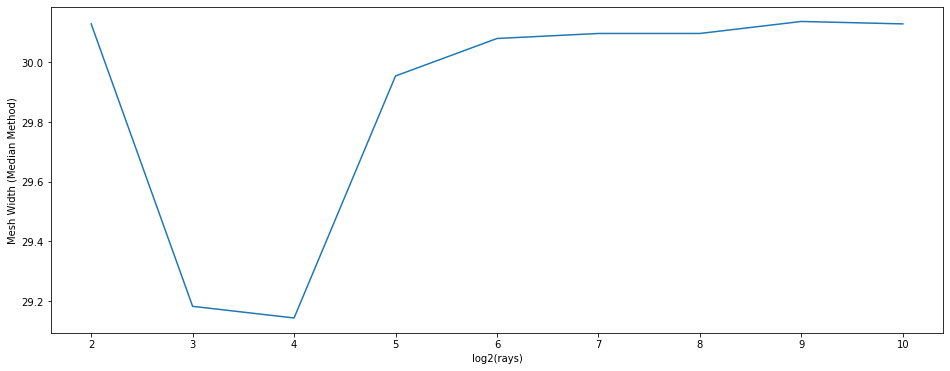

In [43]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, mw_medians)
ax.set(xlabel="log2(rays)", ylabel="Mesh Width (Median Method)")
plt.show()

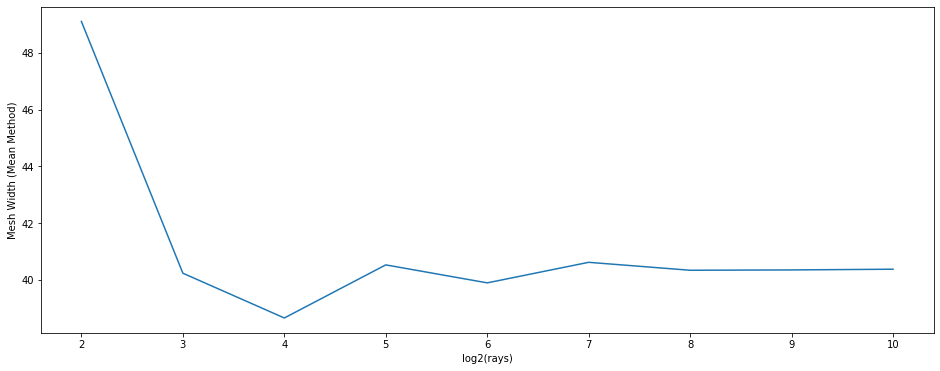

In [44]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, mw_means)
ax.set(xlabel="log2(rays)", ylabel="Mesh Width (Mean Method)")
plt.show()

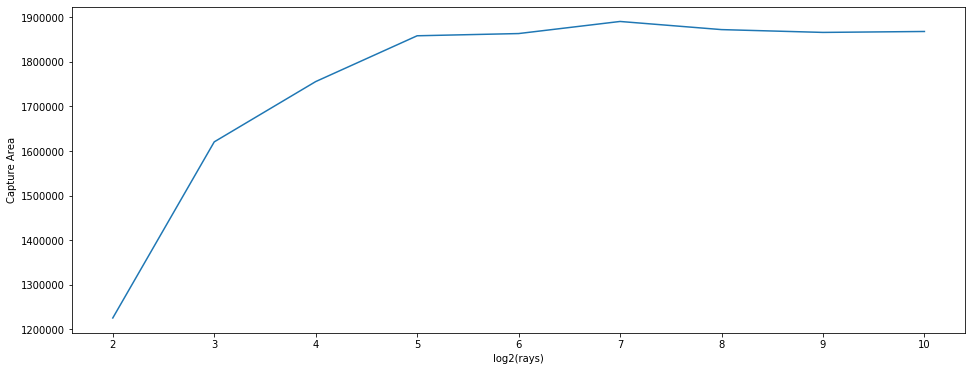

In [45]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, cas)
ax.set(xlabel="log2(rays)", ylabel="Capture Area")
plt.show()

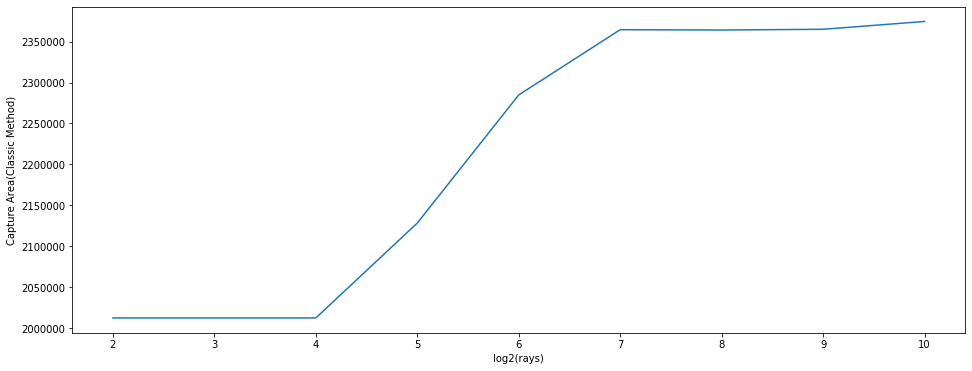

In [46]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, cas_classic)
ax.set(xlabel="log2(rays)", ylabel="Capture Area(Classic Method)")
plt.show()

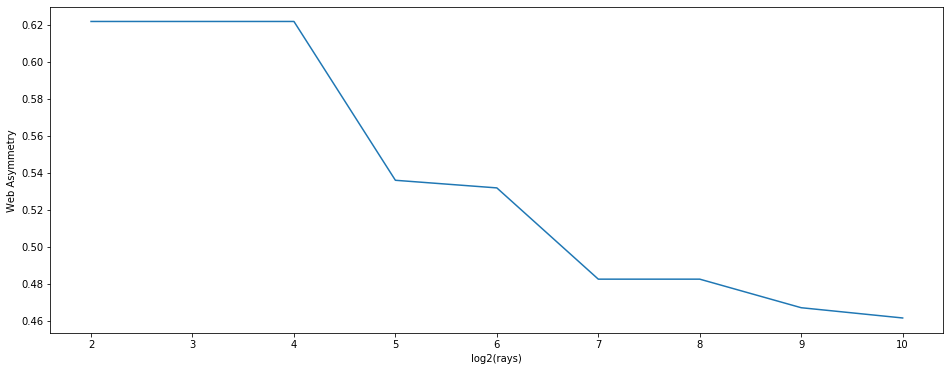

In [47]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, web_asymmetrys)
ax.set(xlabel="log2(rays)", ylabel="Web Asymmetry")
plt.show()

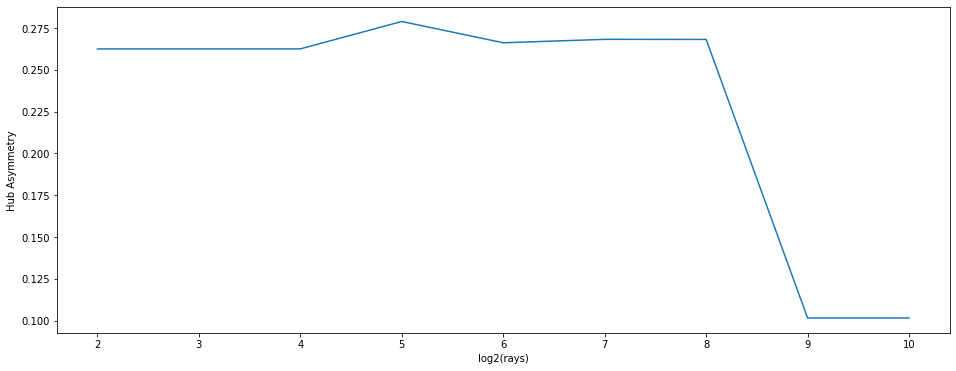

In [48]:
plt.figure(figsize=(16, 6))
ax = sns.lineplot(rays_initial, hub_asymmetrys)
ax.set(xlabel="log2(rays)", ylabel="Hub Asymmetry")
plt.show()

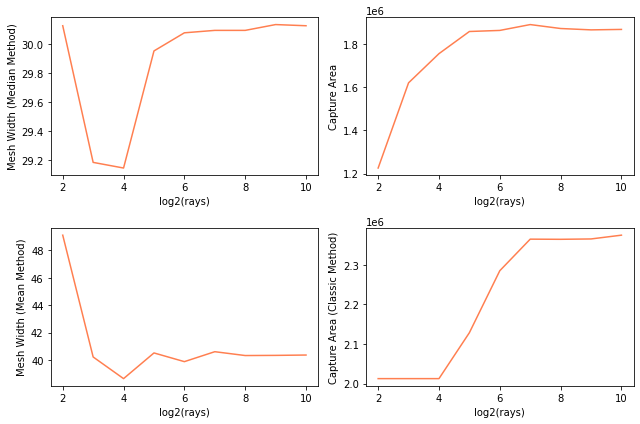

In [49]:
CA_directmeasure = 2181804-97513


fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(9,6))

sns.lineplot(rays_initial, mw_medians, ax=ax[0][0], color = "#FF7F50")
sns.lineplot(rays_initial, mw_means, ax=ax[1][0], color = "#FF7F50")
sns.lineplot(rays_initial, cas, ax=ax[0][1], color = "#FF7F50")
sns.lineplot(rays_initial, cas_classic, ax=ax[1][1], color = "#FF7F50")

# # Direct measurements
# ax[0][0].axhline(31.6, color="#38B1BC")
# ax[1][0].axhline(34.4, color="#38B1BC")
# ax[0][1].axhline(CA_directmeasure, color="#38B1BC")
# ax[1][1].axhline(CA_directmeasure, color="#38B1BC")

# # Old-style measured lines
# ax[0][0].axhline(36.2, color="gray", linestyle="dashed")
# ax[1][0].axhline(36.2, color="gray", linestyle="dashed")
# ax[0][1].axhline(2389117, color="gray", linestyle="dashed")
# ax[1][1].axhline(2389117, color="gray", linestyle="dashed")


ax[0][0].set(xlabel="log2(rays)", ylabel="Mesh Width (Median Method)")#, ylim=(28, 50))
ax[1][0].set(xlabel="log2(rays)", ylabel="Mesh Width (Mean Method)")#, ylim=(28, 50))
ax[0][1].set(xlabel="log2(rays)", ylabel="Capture Area")#, ylim=(1200000, 2500000))
ax[1][1].set(xlabel="log2(rays)", ylabel="Capture Area (Classic Method)")#, ylim=(1200000, 2500000))

ax[0][1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))
ax[1][1].ticklabel_format(axis="y", style="sci", scilimits=(0, 0))

fig.tight_layout()
# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/Convergence.pdf', bbox_inches='tight', dpi=300)

---

- Could use the inbuilt ability to accomodate for missing parts of web.
    - This could be used to investigate how much of the web needs to be destroyed in terms of CA before the spider decides to rebuild
- TODO 07/05/20
    - ✔ Try to add as many statistical derivations as possible (web asymmetry, hub asymmetry, CTL)
    - ✔ The more of these we can get done the more we can truly say "We have superceded the old techniques in every way"
    - ✔ Maybe add the option for using the classic CA method in the case that ray count is set super low.
    - ✔ For this it's probably worth calculating the old and new CA approach and seeing at which point the new method approaches the old one. It'll probably just be at 64 rays but we'll have to check.
- There is a possibility of allowing analysis with super-low ray counts to use the classic calculations for CA if it was desired, as you could get major speedups at the cost of accuracy.
- It is possible that we need to explicitly cast vertical and horizontal rays for calculating the asymmetries as the current method of defining the size of the bounding box seems brittle and inconsistent?

The classic mesh width equation is as follows:

$$\frac{1}{2}\left(\frac{r_u-Hr_u}{S_u-1} + \frac{r_l-Hr_l}{S_l-1}\right)$$

*In this equation, $u$ and $l$ signify the upper and lower halves of the web. $r$ is the radius of the half, $Hr$ is the radius of the hub and free zone in that half and $S$ is the number of spiral rows of the capture thread in the half of the web. Note: 1 is subtracted from the number of spiral rows, as the first one is the starting point*

This only takes **2 ray samples** and averages them over the web, which we can show is potentially a terrible method of doing it! It also assumes that the web is basically a circle, so doesn't even account for a horizontal ellipsoid warp (which would add more spiral turns at the side).

This means that the new method is vastly more accurate, more robust, and quicker than the traditional method.



|Run Type | Measurements |   Rays  | Time |
|---------|--------------|---------|------|
|Manual   | Spiral Turns | 4       | 60s  |
|Manual   | MW           | 2       | 40s  |
|Manual   | CA           | -       | 40s  |
|Automated| MW & CA      | 4       | 0.1s |
|Automated| MW & CA      | 64     *| 1.9s |
|Automated| MW & CA      | 1024 \**| 29.3s|
|Automated| MW & CA      | 2000    | 57.2s|

\* = minimum reasonable number of rays to approach the correct answer<br>
\** = optimal number of rays to get correct answer

Approx execution time is <0.03s/ray, giving an approximate speedup over the classic MW sampling method of AT LEAST 400x!!! (this was measured against just counting the sticky spiral turns, so it is a conservative estimate)

Realistically it takes approximately 80s to measure a web for MW and CA for someone experienced with the software. Thus the analysis speedup is more in the realm of 800x, however with 2 rays this would give a pretty shoddy estimate of the measurements. Even with enough rays to get a really really good measurement, the time is more than halved.

We can probably do over 2500 ray casts in the time it takes to measure one web for MW and CA.

The classic capture area equation is as follows:
$$\left(\frac{d_v}{2}\right)\left(\frac{d_h}{2}\right)\pi-\left(\frac{H}{2}\right)^2\pi$$

Approximate time to take measurements by hand was 40s

## Writeup Outputs
### Figure 5

In [86]:
intersection_points, outer_area_triangles, inner_area_triangles, summary_dict, construction_lines, boundary_points = analyse_mw_ca(testkernel, (1257, 847), 64, True, progressbar=True)
display(summary_dict)

IntProgress(value=0, description='Progress 0/64', max=64)

{'mw_median': 30.079744301016195,
 'mw_mean': 39.88709563096156,
 'ca': 1863416.264108603,
 'ca_classic': 2284848.1858132808,
 'web_asymmetry': 0.531825308723624,
 'hub_asymmetry': 0.2662220364412663,
 'mesh_measurements': [66.0,
  282.51428571428573,
  6.2634920634920945,
  5.0,
  111.24137931034488,
  39.667711598745996,
  10.638554216867533,
  33.73858057859118,
  31.605738713786454,
  38.05045443863624,
  39.69020133553795,
  32.069348510231194,
  33.77547621703724,
  74.58804861082764,
  79.80146099165746,
  32.37952333930669,
  32.690263175050525,
  8.629214723828383,
  38.68753478510244,
  25.600663879622036,
  29.51030100404431,
  33.61261539945485,
  105.52778376969826,
  94.72867365687917,
  32.53513960868467,
  30.845072795394874,
  35.74821100108567,
  38.118523429274916,
  31.533491205516004,
  34.94973916874296,
  75.53823315868318,
  79.03187572174899,
  109.73934476644654,
  29.508205741812617,
  45.20132367796375,
  89.81416839483474,
  40.96024502458129,
  31.68605757

In [51]:
colourscheme = {
    "bg": "#ffffff",
    "linemap": ["gray", "#bbbbbb", "#bbbbbb", "#7AD151", "#bbbbbb"],
}

#440154
#414487
#2A788E
#22A884
#7AD151
#FDE725

colourscheme = {
    "bg": "#ffffff",
    "linemap": ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"],
    "web": "#38B1BC", #414487
    "construction": "#dddddd",
    "interest": "#FF7F50", #00CED1
}

#50F3FF#48DDE9#38B1BC
#FF7F50
#A40E4C
#2C2C54
#ACC3A6

<span style="color:#50F3FF">&#9673;</span><span style="color:#FF7F50">&#9673;</span><span style="color:#A40E4C">&#9673;</span><span style="color:#2C2C54">&#9673;</span><span style="color:#ACC3A6">&#9673;</span>


In [52]:
intersection_points_np = np.array(intersection_points)
intersection_x, intersection_y = intersection_points_np[:, 0], intersection_points_np[:, 1]

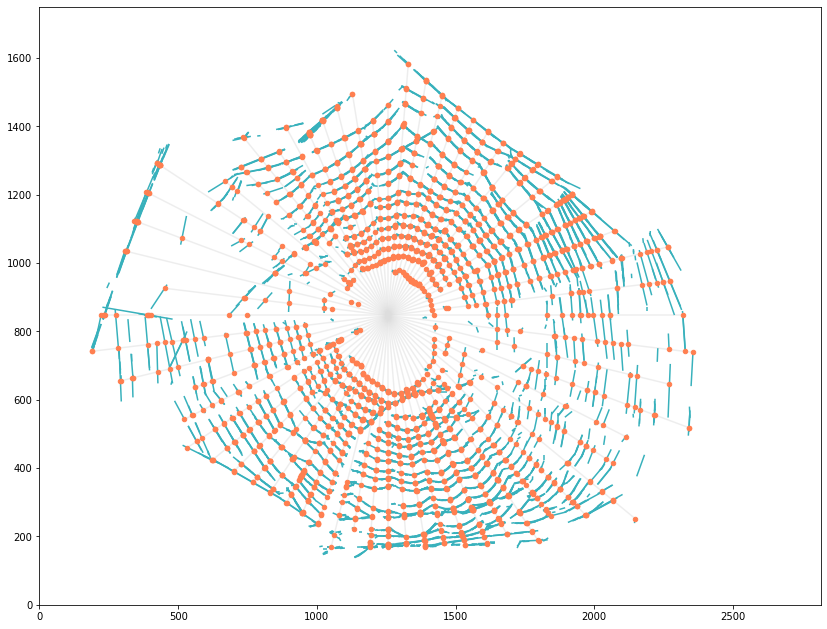

In [53]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["web"] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

# Init plot
fig, ax = plt.subplots(1, figsize=(14, 11))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(intersection_x, intersection_y, marker='o', c=colourscheme["interest"], s=20, zorder=2)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)
    
ax.set_xlim((0, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

# ax.axis('off')
plt.show()

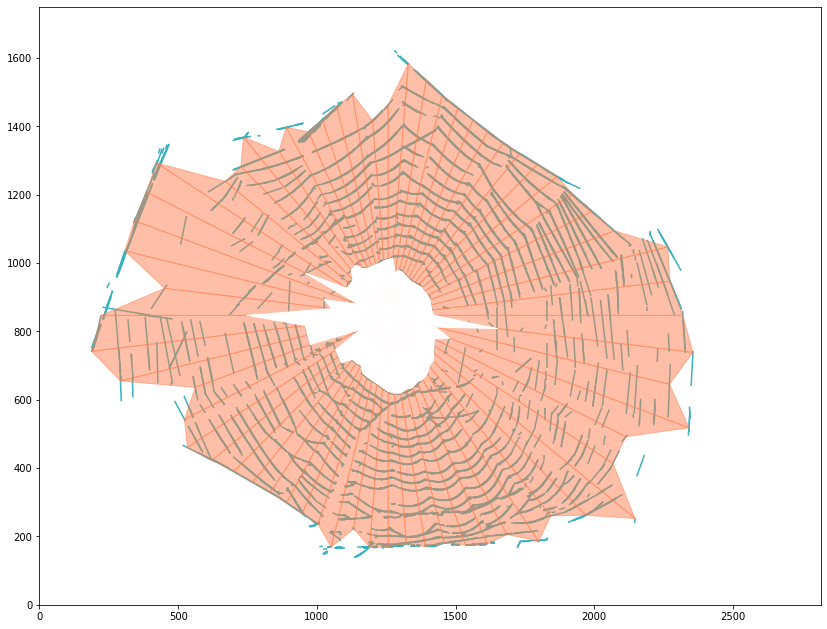

In [54]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

filter_lines = ["sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["web"] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)        

tris_out = [Polygon(x) for x in outer_area_triangles]
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["interest"], zorder=2)
tris_in_coll = PatchCollection(tris_in, alpha=1, color=colourscheme["bg"], zorder=3)

fig, ax = plt.subplots(1, figsize=(14, 11))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot web lines
ax.add_collection(weblinecollection)

# for line in construction_lines:
#     p0, p1 = line
#     ax.plot((p0[0], p1[0]), (p0[1], p1[1]), alpha=0.25, color=colourscheme["construction"])

ax.add_collection(tris_out_coll)
ax.add_collection(tris_in_coll)

ax.set_xlim((0, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

plt.show()

#### Presentation Raycast

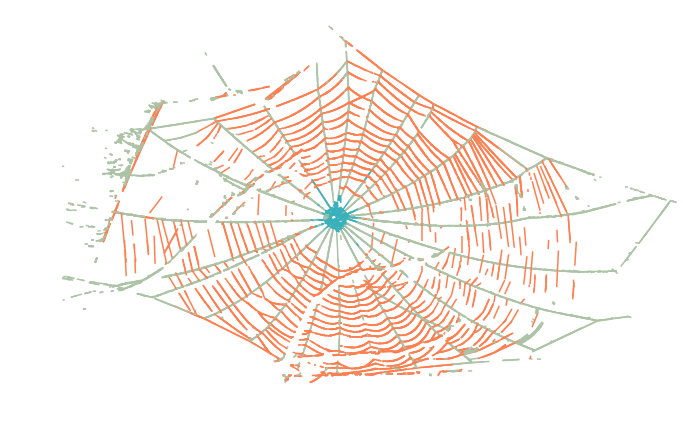

In [55]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

# Init plot
fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
# ax.scatter(intersection_x, intersection_y, marker='o', c=colourscheme["interest"], s=20, zorder=2)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
# ax.add_collection(constructlinecollection)
    
ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
# plt.show()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/unpolar.pdf',dpi=300, bbox_inches='tight')

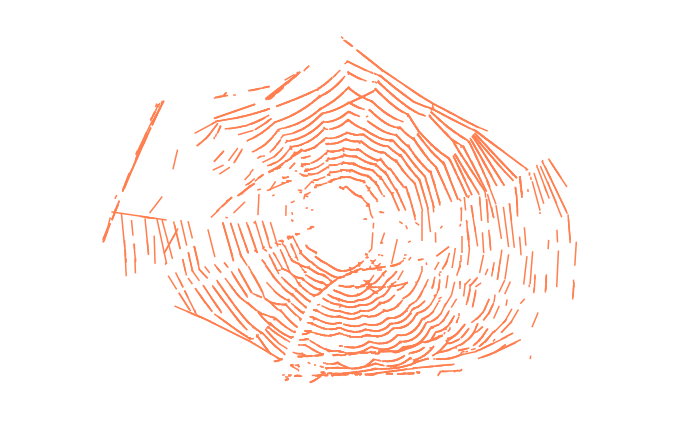

In [56]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

# Init plot
fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
# ax.scatter(intersection_x, intersection_y, marker='o', c=colourscheme["interest"], s=20, zorder=2)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
# ax.add_collection(constructlinecollection)
    
ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
# plt.show()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/unpolar_sticky.pdf',dpi=300, bbox_inches='tight')

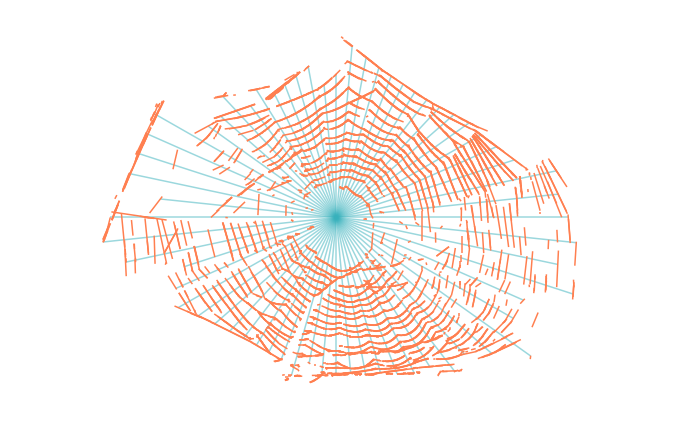

In [57]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors="#38B1BC", zorder=0)

# Init plot
fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
# ax.scatter(intersection_x, intersection_y, marker='o', c=colourscheme["interest"], s=20, zorder=2)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)
    
ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
# plt.show()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/raycast.pdf',dpi=300, bbox_inches='tight')

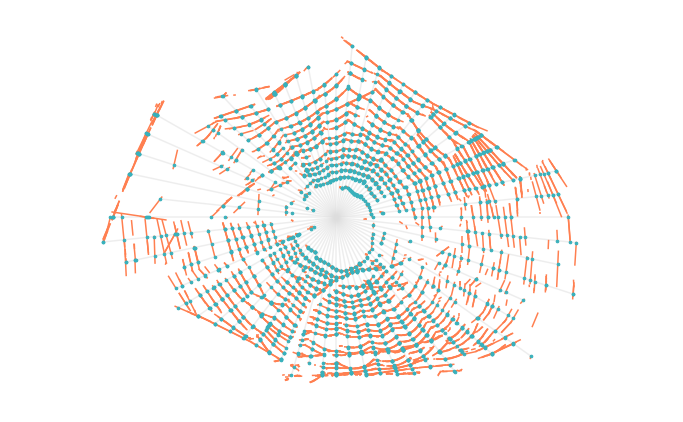

In [58]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

# Init plot
fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(intersection_x, intersection_y, marker='o', c="#38B1BC", s=7, zorder=2)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)
    
ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
# plt.show()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/intersections.pdf',dpi=300, bbox_inches='tight')

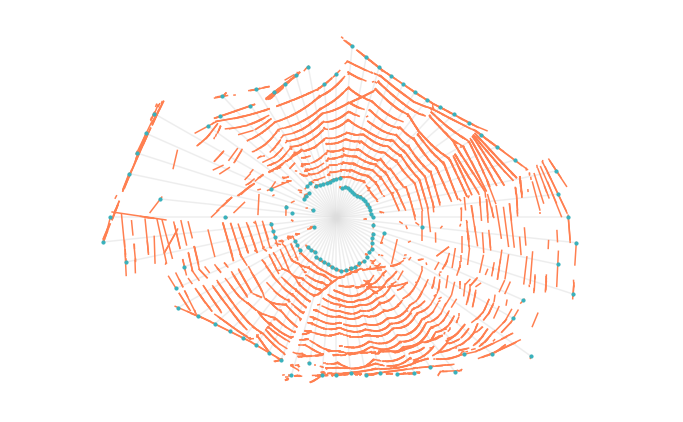

In [59]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

outer_points_np = np.array(boundary_points)
outer_points_x, outer_points_y = outer_points_np[:, 0], outer_points_np[:, 1]

filter_lines = ["sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)        

tris_out = [Polygon(x) for x in outer_area_triangles]
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["interest"], zorder=2)
tris_in_coll = PatchCollection(tris_in, alpha=1, color=colourscheme["bg"], zorder=3)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(outer_points_x, outer_points_y, marker='o', c="#38B1BC", s=10, zorder=4)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)

# for line in construction_lines:
#     p0, p1 = line
#     ax.plot((p0[0], p1[0]), (p0[1], p1[1]), alpha=0.25, color=colourscheme["construction"])

# ax.add_collection(tris_out_coll)
# ax.add_collection(tris_in_coll)

ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/outerboundary.pdf',dpi=300, bbox_inches='tight')

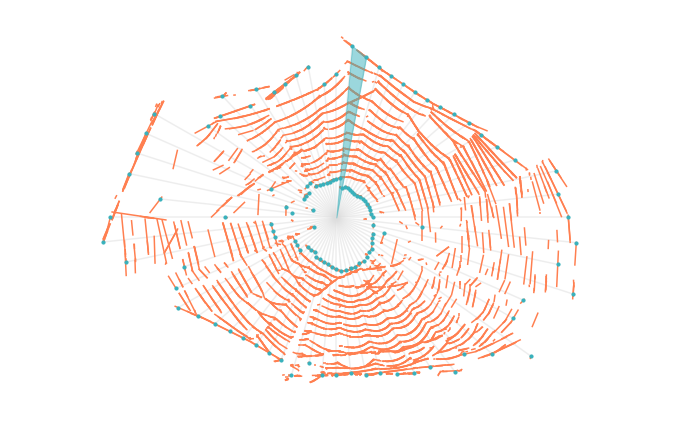

In [60]:
filter_lines = ["sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)        

tris_out = [Polygon(x) for x in outer_area_triangles]
tris_out = [tris_out[-18]]  # CONTROL TRI
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["web"], zorder=2)
# tris_in_coll = PatchCollection(tris_in, alpha=1, color=colourscheme["bg"], zorder=3)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(outer_points_x, outer_points_y, marker='o', c="#38B1BC", s=10, zorder=4)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)

# for line in construction_lines:
#     p0, p1 = line
#     ax.plot((p0[0], p1[0]), (p0[1], p1[1]), alpha=0.25, color=colourscheme["construction"])

ax.add_collection(tris_out_coll)
# ax.add_collection(tris_in_coll)

ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/1triouter.pdf',dpi=300, bbox_inches='tight')

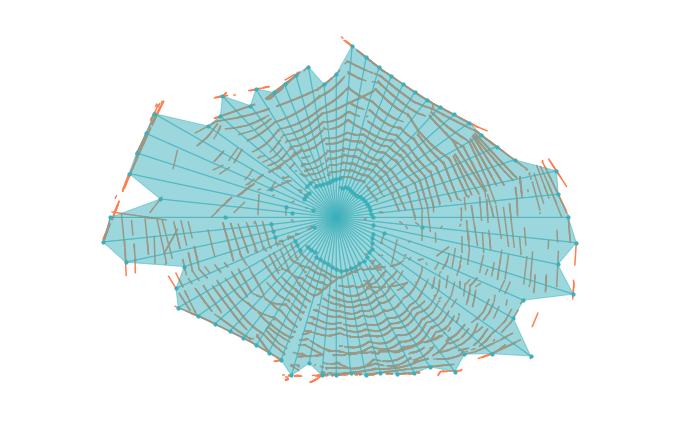

In [61]:
filter_lines = ["sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)        

tris_out = [Polygon(x) for x in outer_area_triangles]
# tris_out = [tris_out[-9]]
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["web"], zorder=2)
# tris_in_coll = PatchCollection(tris_in, alpha=1, color=colourscheme["bg"], zorder=3)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(outer_points_x, outer_points_y, marker='o', c="#38B1BC", s=10, zorder=4)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)

# for line in construction_lines:
#     p0, p1 = line
#     ax.plot((p0[0], p1[0]), (p0[1], p1[1]), alpha=0.25, color=colourscheme["construction"])

ax.add_collection(tris_out_coll)
# ax.add_collection(tris_in_coll)

ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/alltrisouter.pdf',dpi=300, bbox_inches='tight')

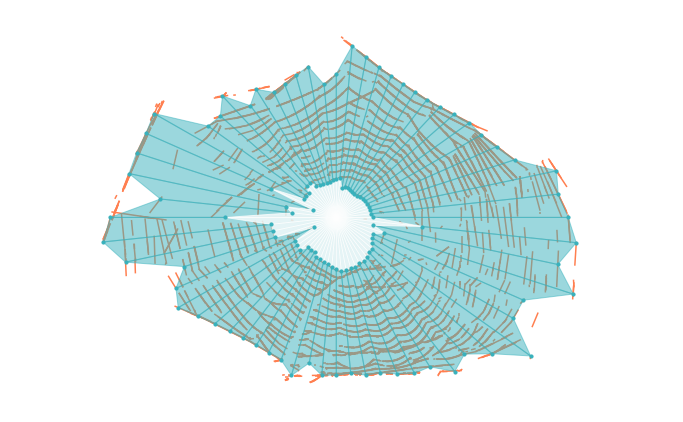

In [62]:
filter_lines = ["sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=1)        

tris_out = [Polygon(x) for x in outer_area_triangles]
# tris_out = [tris_out[-9]]
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["web"], zorder=2)
tris_in_coll = PatchCollection(tris_in, alpha=0.75, color=colourscheme["bg"], zorder=3)

# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

fig, ax = plt.subplots(1, figsize=(12, 7.5))
ax.patch.set_facecolor(colourscheme["bg"])

# Plot intersection points
ax.scatter(outer_points_x, outer_points_y, marker='o', c="#38B1BC", s=10, zorder=4)

# Plot web lines
ax.add_collection(weblinecollection)

# Plot construction lines
ax.add_collection(constructlinecollection)

# for line in construction_lines:
#     p0, p1 = line
#     ax.plot((p0[0], p1[0]), (p0[1], p1[1]), alpha=0.25, color=colourscheme["construction"])

ax.add_collection(tris_out_coll)
ax.add_collection(tris_in_coll)

ax.set_xlim((-250, testkernel.dimensions[0]))
ax.set_ylim((0, 1750))

ax.axis('off')
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/capturearea.pdf',dpi=300, bbox_inches='tight')

#### Final Plot

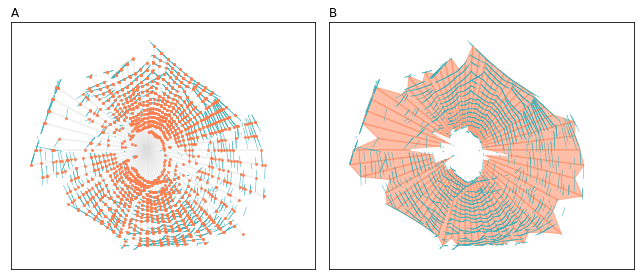

In [63]:
# Preprep
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Sticky"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))



plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["web"] for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1,linewidths=0.5, colors=plotline_colours, zorder=1)
# Can't use the same object in multiple axes
weblinecollection2 = LineCollection(plotlines_raw, alpha=1,linewidths=0.5, colors=plotline_colours, zorder=4)  
# Generate construction line collection
constructlinecollection = LineCollection(construction_lines, alpha=0.5, colors=colourscheme["construction"], zorder=0)

# Generate area tris
tris_out = [Polygon(x) for x in outer_area_triangles]
tris_in = [Polygon(x) for x in inner_area_triangles]

tris_out_coll = PatchCollection(tris_out, alpha=0.5, color=colourscheme["interest"], zorder=2)
tris_in_coll = PatchCollection(tris_in, alpha=1, color=colourscheme["bg"], zorder=3)

# Plotting
fig, ax = plt.subplots(ncols=2, figsize=(9, 4))
ax[0].patch.set_facecolor(colourscheme["bg"])
ax[1].patch.set_facecolor(colourscheme["bg"])

# Plot 1
# Plot intersection points
ax[0].scatter(intersection_x, intersection_y, marker='o', c=colourscheme["interest"], s=3, zorder=2)

# Plot web lines
ax[0].add_collection(weblinecollection)

# Plot construction lines
ax[0].add_collection(constructlinecollection)

# Plot 2
ax[1].add_collection(weblinecollection2)
ax[1].add_collection(tris_out_coll)
ax[1].add_collection(tris_in_coll)

ax[1].set_xlim((0, testkernel.dimensions[0]))
ax[1].set_ylim((0, 1750))

ax[0].set_xlim((0, testkernel.dimensions[0]))
ax[0].set_ylim((0, 1750))

for axis in ax:
    axis.axes.xaxis.set_ticks([])
    axis.axes.yaxis.set_ticks([])
#     axis.set_frame_on(False)

ax[0].set_title('A', loc='left')
ax[1].set_title('B', loc='left')
ax[0].plot()
ax[1].plot()
fig.tight_layout()
# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/Fig5.pdf', bbox_inches='tight')

### Figure 4

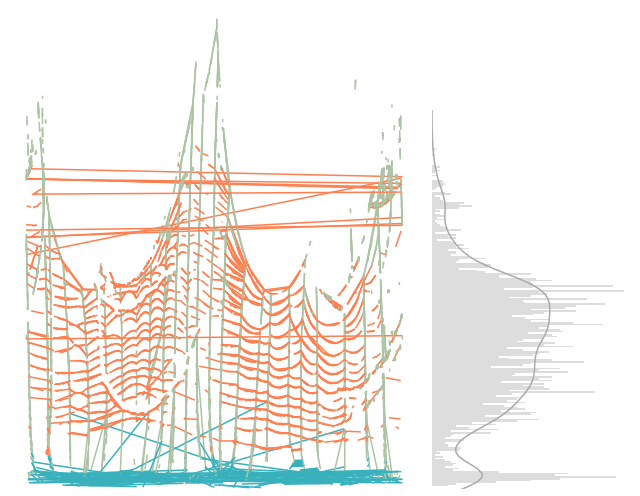

In [64]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.transformed_line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=0)

r_vals = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        # Repeat each value by its normal space length
        r_vals.extend(np.repeat(np.mean(r), (np.ceil(x.length/np.mean(r)))).tolist())

# Init plot
gridsize = (1,3)
fig = plt.figure(figsize=(9, 7))
ax0 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax1 = plt.subplot2grid(gridsize, (0, 2))

ax0.patch.set_facecolor(colourscheme["bg"])

# Plot web lines
ax0.add_collection(weblinecollection)
    
ax0.set_xlim((0, testkernel.dimensions[0]))
ax0.set_ylim((0, 1750))

ax0.autoscale()

sns.distplot(r_vals, hist=True,bins=200, kde=True, color="#aaaaaa", vertical=True, ax=ax1)
# plt.axhline(109, color="gray")
# plt.axhline(125, color="royalblue")
# plt.axhline(700, color="royalblue")
# plt.axhline(750, color="green")
# ax0.set_xlim((0, testkernel.dimensions[0]))
ax0.set_ylim((0, 1600))
# ax1.set_xlim((0, testkernel.dimensions[0]))
ax1.set_ylim((0, 1600))

ax0.axes.xaxis.set_ticks([])
ax0.axes.yaxis.set_ticks([])
ax1.axes.xaxis.set_ticks([])
ax1.axes.yaxis.set_ticks([])

ax0.set_frame_on(False)
ax1.set_frame_on(False)

# fig.set_edgecolor("#000000")
# fig.linewidth = 20
# fig.set_frameon(True)

ax0.plot()
ax1.plot()
fig.tight_layout()
# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/Fig4.pdf', bbox_inches='tight', edgecolor="#000000")

### Figure 4 - Presentation

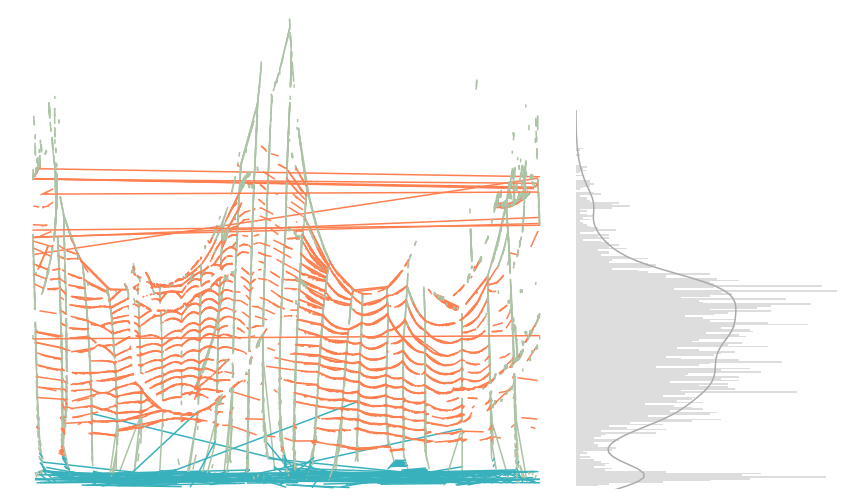

In [65]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate web line collection
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
plotlines_raw = [line.transformed_line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=0)

r_vals = []
for x in testkernel:
    if x.line_type > 1:
        working = list()
        tl = np.array(x.transformed_line)
        t, r = tl[:, 0], tl[:, 1]
        # Repeat each value by its normal space length
        r_vals.extend(np.repeat(np.mean(r), (np.ceil(x.length/np.mean(r)))).tolist())

# Init plot
gridsize = (1,3)
fig = plt.figure(figsize=(12, 7))
ax0 = plt.subplot2grid(gridsize, (0, 0), colspan=2, rowspan=1)
ax1 = plt.subplot2grid(gridsize, (0, 2))

ax0.patch.set_facecolor(colourscheme["bg"])

# Plot web lines
ax0.add_collection(weblinecollection)
    
ax0.set_xlim((0, testkernel.dimensions[0]))
ax0.set_ylim((0, 1750))

ax0.autoscale()

sns.distplot(r_vals, hist=True,bins=200, kde=True, color="#aaaaaa", vertical=True, ax=ax1)
# plt.axhline(109, color="gray")
# plt.axhline(125, color="royalblue")
# plt.axhline(700, color="royalblue")
# plt.axhline(750, color="green")
# ax0.set_xlim((0, testkernel.dimensions[0]))
ax0.set_ylim((0, 1600))
# ax1.set_xlim((0, testkernel.dimensions[0]))
ax1.set_ylim((0, 1600))

ax0.axes.xaxis.set_ticks([])
ax0.axes.yaxis.set_ticks([])
ax1.axes.xaxis.set_ticks([])
ax1.axes.yaxis.set_ticks([])

ax0.set_frame_on(False)
ax1.set_frame_on(False)

# fig.set_edgecolor("#000000")
# fig.linewidth = 20
# fig.set_frameon(True)

ax0.plot()
ax1.plot()
fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/polar_classified_wdist.pdf',dpi=300, bbox_inches='tight')

### Figure 3

97.4392752349142


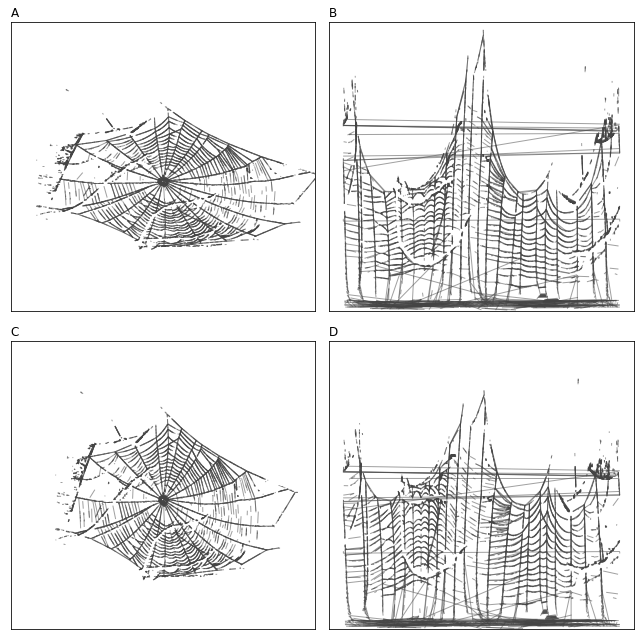

In [66]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

# Gen normal
plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate normal web line collections
plotline_colours = ["#444444" for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
plotlines_raw_transformed = [line.transformed_line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=0.5, colors=plotline_colours, zorder=0, linewidths=1)
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=0.5, colors=plotline_colours, zorder=0, linewidths=1)

# Gen ellipse polar
ellipse_scale = 0.85
ellipse_orientation = 0

ellipsekernel = load_kernel("../data/full_web_kernel_best.json", flipped=False)
ellipse_classify_map = classify_threads_flexible(ellipsekernel, (1257, 847), np.pi/5, ellipse_orientation=ellipse_orientation, ellipse_scale=ellipse_scale) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
ellipsekernel.paint(ellipse_classify_map, reset_missing=True)

ellipse_plotlines = [line for line in ellipsekernel if line.line_type in incl_linetypes]
ellipse_plotline_colours = ["#444444" for line in ellipse_plotlines]
ellipse_plotlines_raw_transformed = [line.transformed_line for line in ellipse_plotlines]
ellipse_weblinecollection_transformed = LineCollection(ellipse_plotlines_raw_transformed, alpha=0.5, colors=ellipse_plotline_colours, zorder=0, linewidths=1)


# Retransform ellipse only
ellipsekernel.ellipse_transform((1257, 847), ellipse_orientation, ellipse_scale)
ellipse_plotlines = [line for line in ellipsekernel if line.line_type in incl_linetypes]
ellipse_plotlines_raw = [line.transformed_line for line in ellipse_plotlines]
ellipse_weblinecollection = LineCollection(ellipse_plotlines_raw, alpha=0.5, colors=ellipse_plotline_colours, zorder=0, linewidths=1)

# Plot
fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(9, 9))#9,9
ax[0][0].patch.set_facecolor(colourscheme["bg"])
ax[0][1].patch.set_facecolor(colourscheme["bg"])
ax[1][0].patch.set_facecolor(colourscheme["bg"])
ax[1][1].patch.set_facecolor(colourscheme["bg"])

ax[0][0].add_collection(weblinecollection)
ax[0][1].add_collection(weblinecollection_transformed)
ax[1][0].add_collection(ellipse_weblinecollection)
ax[1][1].add_collection(ellipse_weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax[0][0].autoscale()
ax[0][1].autoscale()
ax[1][0].autoscale()
ax[1][1].autoscale()

ax[0][0].set_xlim((-250, 2750))
ax[1][0].set_xlim((-250, 2750))
ax[0][0].set_ylim((-500, 2500))
ax[1][0].set_ylim((-500, 2500))

# ax[0][1].set_xlim((0, 3000))
# ax[1][1].set_xlim((0, 3000))
ax[0][1].set_ylim((0, 1600))
ax[1][1].set_ylim((0, 1600))

ax[0][0].set_title('A', loc='left')
ax[0][1].set_title('B', loc='left')
ax[1][0].set_title('C', loc='left')
ax[1][1].set_title('D', loc='left')

# ax[0][0].set_frame_on(False)
# ax[0][1].set_frame_on(False)
# ax[1][0].set_frame_on(False)
# ax[1][1].set_frame_on(False)

ax[0][0].axes.xaxis.set_ticks([])
ax[0][0].axes.yaxis.set_ticks([])
ax[0][1].axes.xaxis.set_ticks([])
ax[0][1].axes.yaxis.set_ticks([])
ax[1][0].axes.xaxis.set_ticks([])
ax[1][0].axes.yaxis.set_ticks([])
ax[1][1].axes.xaxis.set_ticks([])
ax[1][1].axes.yaxis.set_ticks([])

ax[0][0].plot()
ax[0][1].plot()
ax[1][0].plot()
ax[1][1].plot()

fig.tight_layout()
# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/Fig3.pdf', bbox_inches='tight', dpi=300)

97.4392752349142


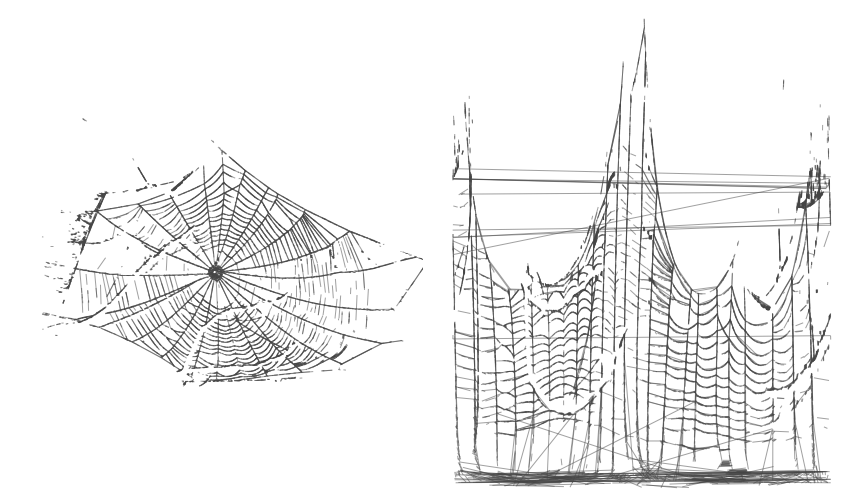

In [79]:
linetypes = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]
filter_lines = ["Uncategorised", "Radial", "Hub", "Sticky", "Frame"]

incl_linetypes = set()
for lt in filter_lines:
    try:
        incl_linetypes.add(linetypes.index(lt.title()))
    except ValueError:
        warnings.warn('"{}" is not a valid linetype, ignoring.'.format(lt))

# Gen normal
plotlines = [line for line in testkernel if line.line_type in incl_linetypes]

# Generate normal web line collections
plotline_colours = ["#444444" for line in plotlines]
plotlines_raw = [line.line for line in plotlines]
plotlines_raw_transformed = [line.transformed_line for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=0.5, colors=plotline_colours, zorder=0, linewidths=1)
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=0.5, colors=plotline_colours, zorder=0, linewidths=1)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 7))#9,9
ax[0].patch.set_facecolor(colourscheme["bg"])
ax[1].patch.set_facecolor(colourscheme["bg"])

ax[0].add_collection(weblinecollection)
ax[1].add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax[0].autoscale()
ax[1].autoscale()

ax[0].set_xlim((-250, 2750))
ax[0].set_ylim((-500, 2500))

ax[1].set_ylim((0, 1600))

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)

ax[0].axes.xaxis.set_ticks([])
ax[0].axes.yaxis.set_ticks([])
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

ax[0].plot()
ax[1].plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/normal_and_polar.pdf',dpi=300, bbox_inches='tight')

97.4392752349142


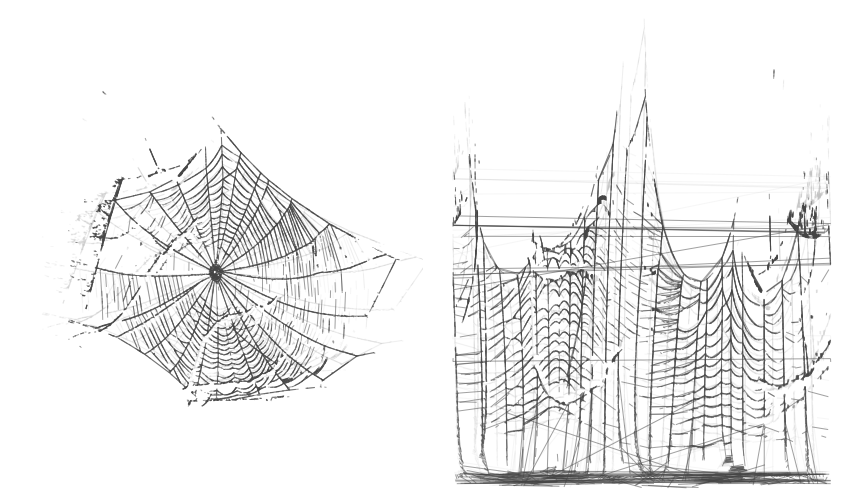

In [84]:
# Gen ellipse polar
ellipse_scale = 0.85
ellipse_orientation = 0

ellipsekernel = load_kernel("../data/full_web_kernel_best.json", flipped=False)
ellipse_classify_map = classify_threads_flexible(ellipsekernel, (1257, 847), np.pi/5, ellipse_orientation=ellipse_orientation, ellipse_scale=ellipse_scale) # Hub may well be (1257, 847) after flipping, 1257, 1105 before.
ellipsekernel.paint(ellipse_classify_map, reset_missing=True)

ellipse_plotlines = [line for line in ellipsekernel if line.line_type in incl_linetypes]
ellipse_plotline_colours = ["#444444" for line in ellipse_plotlines]
ellipse_plotlines_raw_transformed = [line.transformed_line for line in ellipse_plotlines]
ellipse_weblinecollection_transformed = LineCollection(ellipse_plotlines_raw_transformed, alpha=0.5, colors=ellipse_plotline_colours, zorder=1, linewidths=1)


# Retransform ellipse only
ellipsekernel.ellipse_transform((1257, 847), ellipse_orientation, ellipse_scale)
ellipse_plotlines = [line for line in ellipsekernel if line.line_type in incl_linetypes]
ellipse_plotlines_raw = [line.transformed_line for line in ellipse_plotlines]
ellipse_weblinecollection = LineCollection(ellipse_plotlines_raw, alpha=0.5, colors=ellipse_plotline_colours, zorder=1, linewidths=1)

# Regen
weblinecollection = LineCollection(plotlines_raw, alpha=0.125, colors="#bbbbbb", zorder=0, linewidths=1)
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=0.125, colors="#bbbbbb", zorder=0, linewidths=1)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(12, 7))#9,9
ax[0].patch.set_facecolor(colourscheme["bg"])
ax[1].patch.set_facecolor(colourscheme["bg"])

ax[0].add_collection(ellipse_weblinecollection)
ax[0].add_collection(weblinecollection)
ax[1].add_collection(ellipse_weblinecollection_transformed)
ax[1].add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax[0].autoscale()
ax[1].autoscale()

ax[0].set_xlim((-250, 2750))
ax[0].set_ylim((-500, 2500))

ax[1].set_ylim((0, 1600))

ax[0].set_frame_on(False)
ax[1].set_frame_on(False)

ax[0].axes.xaxis.set_ticks([])
ax[0].axes.yaxis.set_ticks([])
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

ax[0].plot()
ax[1].plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/normal_and_polar_ellipse.pdf',dpi=300, bbox_inches='tight')

In [68]:
testkernel.dimensions

[2816, 2112]

Make into one figure

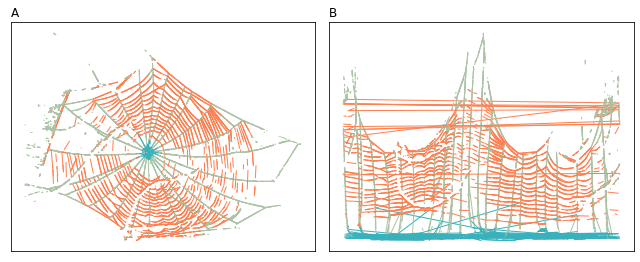

In [69]:
plotline_colours = [colourscheme["linemap"][line.line_type] for line in plotlines]
weblinecollection = LineCollection(plotlines_raw, alpha=1, colors=plotline_colours, zorder=0 ,linewidths=1)
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=1, colors=plotline_colours, zorder=0, linewidths=1)

# Plot
fig, ax = plt.subplots(ncols=2, figsize=(9, 3.75))#9,9

ax[0].patch.set_facecolor(colourscheme["bg"])
ax[1].patch.set_facecolor(colourscheme["bg"])

ax[0].add_collection(weblinecollection)
ax[1].add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax[0].autoscale()
ax[1].autoscale()

ax[0].set_title('A', loc='left')
ax[1].set_title('B', loc='left')

# ax.set_xlim((-250, 2750))
# ax.set_ylim((-500, 2000))

# ax.set_frame_on(False)

ax[0].axes.xaxis.set_ticks([])
ax[0].axes.yaxis.set_ticks([])
ax[1].axes.xaxis.set_ticks([])
ax[1].axes.yaxis.set_ticks([])

ax[0].plot()
ax[1].plot()

fig.tight_layout()
# plt.savefig('../../../LaTeX/Writeups/ESA_Writeup/Images/Fig6.pdf', bbox_inches='tight', dpi=300)

### Presentation Classification Graphics

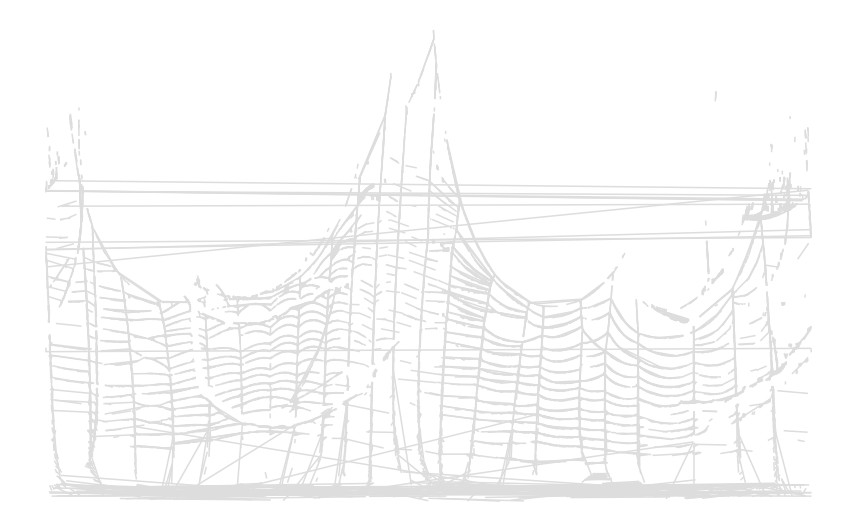

In [70]:
# justvert = ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]
justvert = ["#dddddd", "#dddddd", "#dddddd", "#dddddd", "#dddddd"]
plotline_colours = [justvert[line.line_type] for line in plotlines]
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=1, colors=plotline_colours, zorder=0)


# Plot
fig, ax = plt.subplots(figsize=(12, 7.5))#9,9
ax.patch.set_facecolor(colourscheme["bg"])

ax.add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax.autoscale()

# ax.set_xlim((-250, 2750))
# ax.set_ylim((-500, 2000))

ax.set_frame_on(False)

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax.plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/polar_unclassified.pdf', dpi=300, bbox_inches='tight')

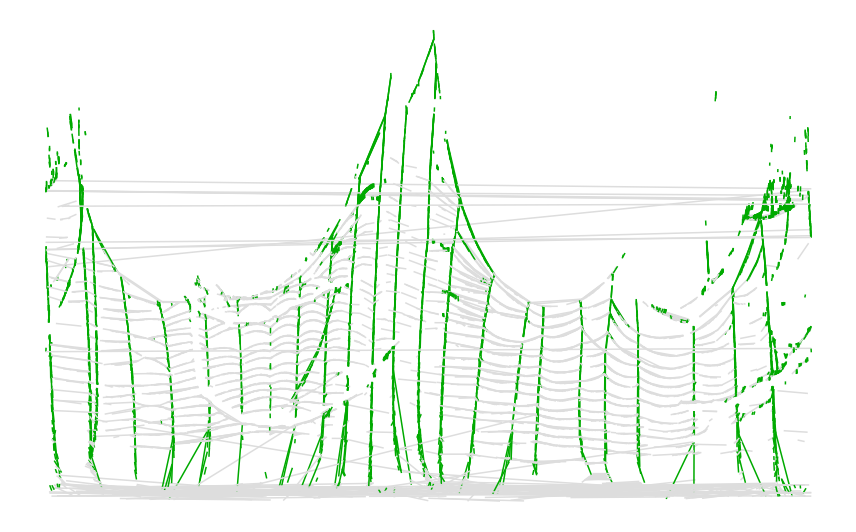

In [71]:
# justvert = ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]
justvert = ["#dddddd", "#00aa00", "#dddddd", "#dddddd", "#dddddd"]
plotline_colours = [justvert[line.line_type] for line in plotlines]
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=1, colors=plotline_colours, zorder=0)


# Plot
fig, ax = plt.subplots(figsize=(12, 7.5))#9,9
ax.patch.set_facecolor(colourscheme["bg"])

ax.add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax.autoscale()

# ax.set_xlim((-250, 2750))
# ax.set_ylim((-500, 2000))

ax.set_frame_on(False)

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax.plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/polar_vert.pdf',dpi=300, bbox_inches='tight')

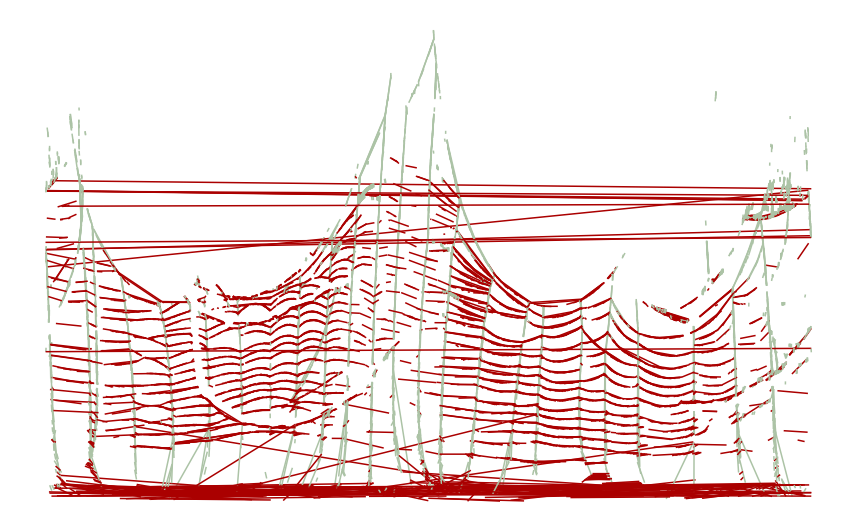

In [72]:
# justvert = ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]
verthoriz = ["#dddddd", "#ACC3A6", "#aa0000", "#aa0000", "#dddddd"]
plotline_colours = [verthoriz[line.line_type] for line in plotlines]
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=1, colors=plotline_colours, zorder=0)


# Plot
fig, ax = plt.subplots(figsize=(12, 7.5))#9,9
ax.patch.set_facecolor(colourscheme["bg"])

ax.add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax.autoscale()

# ax.set_xlim((-250, 2750))
# ax.set_ylim((-500, 2000))

ax.set_frame_on(False)

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax.plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/polar_verthoriz.pdf',dpi=300, bbox_inches='tight')

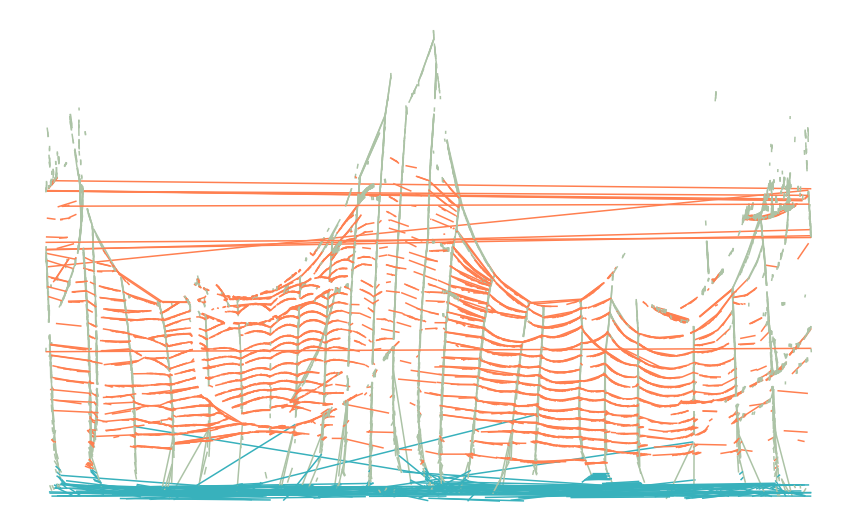

In [73]:
# justvert = ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]
allcols = ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]
plotline_colours = [allcols[line.line_type] for line in plotlines]
weblinecollection_transformed = LineCollection(plotlines_raw_transformed, alpha=1, colors=plotline_colours, zorder=0)


# Plot
fig, ax = plt.subplots(figsize=(12, 7.5))#9,9
ax.patch.set_facecolor(colourscheme["bg"])

ax.add_collection(weblinecollection_transformed)

# ax[0][0].set_ylim((0, 1750))

ax.autoscale()

# ax.set_xlim((-250, 2750))
# ax.set_ylim((-500, 2000))

ax.set_frame_on(False)

ax.axes.xaxis.set_ticks([])
ax.axes.yaxis.set_ticks([])

ax.plot()

fig.tight_layout()
plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/polar_classified.pdf',dpi=300, bbox_inches='tight')

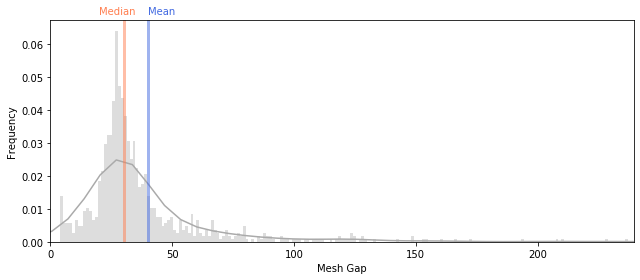

In [134]:
# "linemap": ["#ACC3A6", "#ACC3A6", "#38B1BC", "#FF7F50", "#dddddd"]


fig, ax = plt.subplots(figsize=(9,4))
sns.distplot(summary_dict["mesh_measurements"], hist=True,bins=500, kde=True, color="#aaaaaa", axlabel="Mesh Gap", ax=ax)

# ax[0].set_title('A', loc='left')
# ax[1].set_title('B', loc='left')
# ax[2].set_title('C', loc='left')

ax.set_xlim(0,max(summary_dict["mesh_measurements"])*0.4)
ax.axvline(summary_dict["mw_median"], color="#FF7F50", lw=3, alpha=0.5)
ax.text(x=summary_dict["mw_median"]-10, y=0.069, s='Median', alpha=1, color='#FF7F50')

ax.axvline(summary_dict["mw_mean"], color="royalblue", lw=3, alpha=0.5)
ax.text(x=summary_dict["mw_mean"], y=0.069, s='Mean', alpha=1, color='royalblue')
# ax.axvline(700, color="#FF7F50")
#     a.axvline(750, color="green")

ax.set_ylabel("Frequency")

fig.tight_layout()
plt.plot()

plt.savefig('../../../LaTeX/Presentations/SpiderWeb_QMEESymp/Images/meshdist.pdf',dpi=300, bbox_inches='tight')